# Continuação Keras 1

## Exploraremos os hiper parâmetros do algoritimo

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

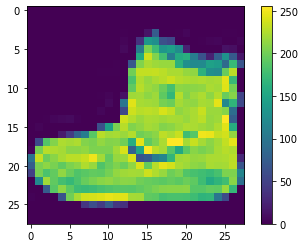

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 15s 9ms/step - loss: 0.5314 - accuracy: 0.8128 - val_loss: 0.4085 - val_accuracy: 0.8543
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4000 - accuracy: 0.8555 - val_loss: 0.3908 - val_accuracy: 0.8547
Epoch 3/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3653 - accuracy: 0.8655 - val_loss: 0.3480 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3411 - accuracy: 0.8760 - val_loss: 0.3411 - val_accuracy: 0.8722
Epoch 5/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3239 - accuracy: 0.8790 - val_loss: 0.3608 - val_accuracy: 0.8645


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
# por debaixo dos panos temos um array multiplicando outro, ou seja, multiplicação de matrizes
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.06674664,  0.0118607 , -0.02588481, ..., -0.07102602,
        -0.07730432,  0.01622638],
       [ 0.00556521,  0.09390621,  0.03655852, ...,  0.06825049,
         0.06873301, -0.01740154],
       [ 0.05999038,  0.0451789 , -0.12405688, ...,  0.08062021,
         0.04780498, -0.00755421],
       ...,
       [ 0.01551096,  0.06710745,  0.09969728, ...,  0.05409975,
         0.03777216, -0.06376144],
       [ 0.05557337,  0.08943402,  0.05827899, ..., -0.00777906,
         0.24095555,  0.06470338],
       [-0.06884945,  0.12043689,  0.03979446, ...,  0.01052309,
         0.02944497,  0.06424912]], dtype=float32)

In [31]:
# criando array com valores zerados e aleatórios
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_pesos_camada_dense])
'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_pesos_camada_dense])

modelo.layers[1].get_weights()


[array([[0.08506371, 0.37737295, 0.6082986 , ..., 0.15881157, 0.9517258 ,
         0.29355597],
        [0.57969284, 0.68899536, 0.64905345, ..., 0.15617537, 0.555076  ,
         0.20193191],
        [0.13911012, 0.99130833, 0.73842317, ..., 0.18345225, 0.9255729 ,
         0.46215892],
        ...,
        [0.6156918 , 0.07653219, 0.46772516, ..., 0.91493165, 0.665747  ,
         0.04815048],
        [0.62530476, 0.01737131, 0.51878756, ..., 0.73408437, 0.8703075 ,
         0.4500514 ],
        [0.55580586, 0.20533577, 0.27860764, ..., 0.6348232 , 0.21518947,
         0.22111376]], dtype=float32),
 array([-0.00234339,  0.29259217,  0.0783061 ,  0.23941855,  0.40583783,
        -0.41105545, -0.12638596,  0.06212105,  0.42711964, -0.3482945 ,
         0.28172946, -0.23968284,  0.19466366, -0.13652675,  0.16240482,
        -0.01664213, -0.00279119,  0.4187794 ,  0.32404175,  0.17376934,
        -0.01387375,  0.1259256 ,  0.23205955,  0.11461485,  0.00373458,
        -0.02744661,  0.09945

In [32]:
#rodando o modelo com o array de pesos zerados
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 120.0329 - accuracy: 0.4116 - val_loss: 15.0974 - val_accuracy: 0.7365
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 31.1969 - accuracy: 0.6317 - val_loss: 10.8891 - val_accuracy: 0.7637
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 14.4760 - accuracy: 0.6978 - val_loss: 6.0494 - val_accuracy: 0.7638
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 7.0952 - accuracy: 0.7327 - val_loss: 4.0296 - val_accuracy: 0.7771
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 3.7470 - accuracy: 0.7578 - val_loss: 2.1253 - val_accuracy: 0.8148


In [35]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

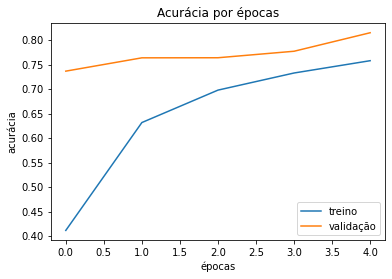

In [33]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

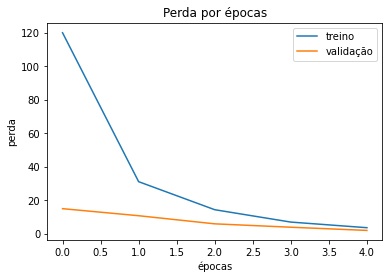

In [34]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [10]:
vieses_pesos_camada_dense = modelo.layers[1].get_weights()[1]
vieses_pesos_camada_dense

array([-0.00234339,  0.29259217,  0.0783061 ,  0.23941855,  0.40583783,
       -0.41105545, -0.12638596,  0.06212105,  0.42711964, -0.3482945 ,
        0.28172946, -0.23968284,  0.19466366, -0.13652675,  0.16240482,
       -0.01664213, -0.00279119,  0.4187794 ,  0.32404175,  0.17376934,
       -0.01387375,  0.1259256 ,  0.23205955,  0.11461485,  0.00373458,
       -0.02744661,  0.09945203,  0.15759261,  0.15220986,  0.19032471,
        0.12039661, -0.23509464,  0.17552388,  0.24549451,  0.16233751,
        0.1348791 , -0.06909952,  0.1463418 , -0.1612582 , -0.08490401,
        0.10557093,  0.33384788, -0.02034314,  0.29822665,  0.23226562,
        0.17055029,  0.1604506 , -0.01055793,  0.30176896,  0.32307643,
        0.06653915, -0.08625884,  0.15459052,  0.00174552,  0.14191157,
       -0.01112457, -0.14217083, -0.00770316, -0.01283977,  0.06921311,
        0.18768263,  0.28341526,  0.1946293 ,  0.23554374,  0.401892  ,
        0.37616563, -0.16138977, -0.01128182,  0.13042533, -0.01

Salvando e carregando o modelo treinado

In [11]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

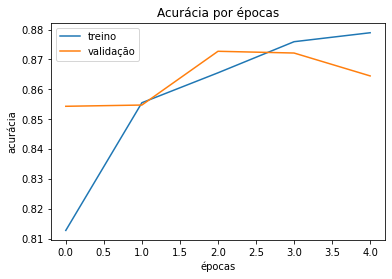

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

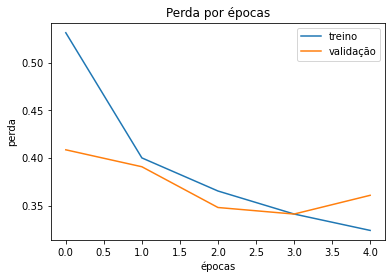

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [14]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 2s 5ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 2s 6ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [15]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 3s 7ms/step - loss: 46.2446 - accuracy: 0.8647
Perda do teste: 46.24462890625
Acurácia do teste: 0.8647000193595886
